# `regression.XGBoostCVRegressor`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.1


In [3]:
from slickml.regression import XGBoostCVRegressor

help(XGBoostCVRegressor)

/Users/amirhessam/Desktop/GitHub/slick-ml/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Help on class XGBoostCVRegressor in module slickml.regression._xgboostcv:

class XGBoostCVRegressor(slickml.regression._xgboost.XGBoostRegressor)
 |  XGBoostCVRegressor(num_boost_round: Optional[int] = 200, sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict[str, Union[str, float, int]]] = None, n_splits: Optional[int] = 4, metrics: Optional[str] = 'rmse', early_stopping_rounds: Optional[int] = 20, random_state: Optional[int] = 1367, shuffle: Optional[bool] = True, verbose: Optional[bool] = True, callbacks: Optional[bool] = False) -> None
 |  
 |  XGBoost CV Regressor.
 |  
 |  This is wrapper using ``XGBoostRegressor`` to train a XGBoost [xgboost-api]_ model with using the optimum
 |  number of boosting rounds from the inputs. It used ``xgboost.cv()`` model with n-folds
 |  cross-validation and train model based on the best number of boosting round to avoid ov

### Example 1: `XGBoostCVRegressor` model for `california-housing` data set

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
)

In [5]:
# custom params
params = {
    "eval_metric": "rmse",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
reg = XGBoostCVRegressor(
    n_splits=10,
    num_boost_round=3000,
    metrics="rmsle",
    params=params,
)
reg.fit(X_train, y_train)

*-* Best Boosting Round = 1870 -*- 10-Folds CV RMSLE: Train = 0.136 +/- 0.000 -*- Test = 0.149 +/- 0.006 *-*


In [6]:
# cv results or (reg.cv_results_)
reg.get_cv_results()

,train-rmsle-mean,train-rmsle-std,test-rmsle-mean,test-rmsle-std
0,0.715107,0.000830,0.715075,0.007482
1,0.688546,0.000814,0.688522,0.007374
2,0.663185,0.000792,0.663177,0.007247
3,0.638985,0.000798,0.639009,0.007105
4,0.615900,0.000791,0.615965,0.006968
...,...,...,...,...
1866,0.136129,0.000486,0.148788,0.005896
1867,0.136122,0.000486,0.148788,0.005896
1868,0.136118,0.000482,0.148792,0.005904
1869,0.136111,0.000482,0.148783,0.005903


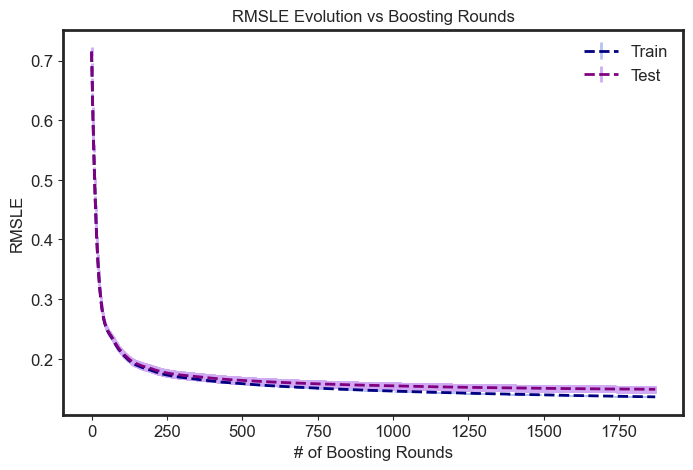

In [7]:
# plot cv results
reg.plot_cv_results()

In [8]:
# feature importrance (reg.get_feature_importance())
reg.feature_importance_

,feature,total_gain
0,F_0,98108.562500
1,F_6,22021.146484
2,F_5,18206.433594
3,F_7,16838.154297
4,F_1,4374.031250
5,F_2,2945.416260
6,F_3,1082.682373
7,F_4,889.887329


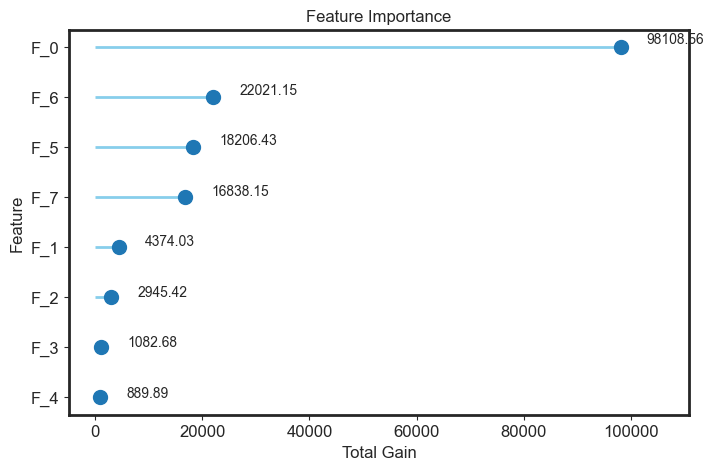

In [9]:
# plot feature importance
reg.plot_feature_importance()

In [10]:
# pred target values (or reg.y_pred_)
y_pred = reg.predict(X_test)
y_pred[:10]

array([2.7951152, 2.7351248, 2.6755323, 4.1935897, 1.9184448, 0.6964765,
       3.0613332, 2.7711234, 1.101879 , 3.0534322], dtype=float32)

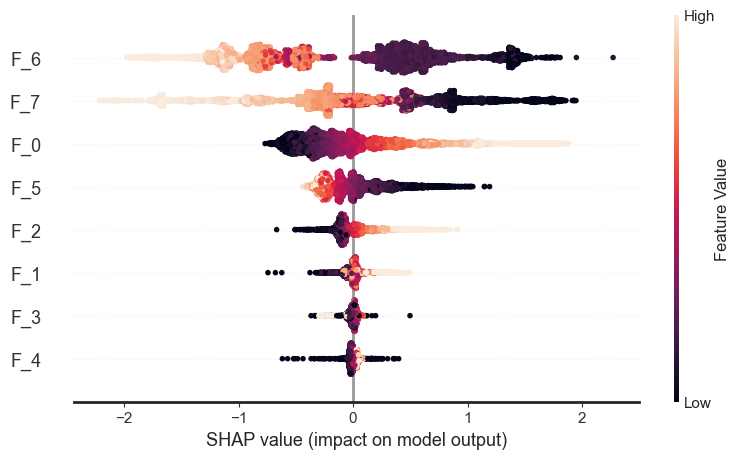

In [11]:
# shap summary plot of validation set
reg.plot_shap_summary(validation=True)

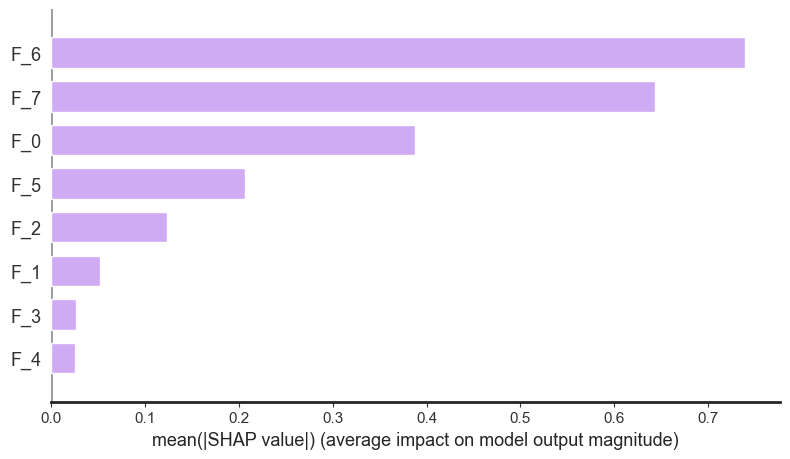

In [12]:
# shap summary bar plot of validation set
reg.plot_shap_summary(plot_type="bar")

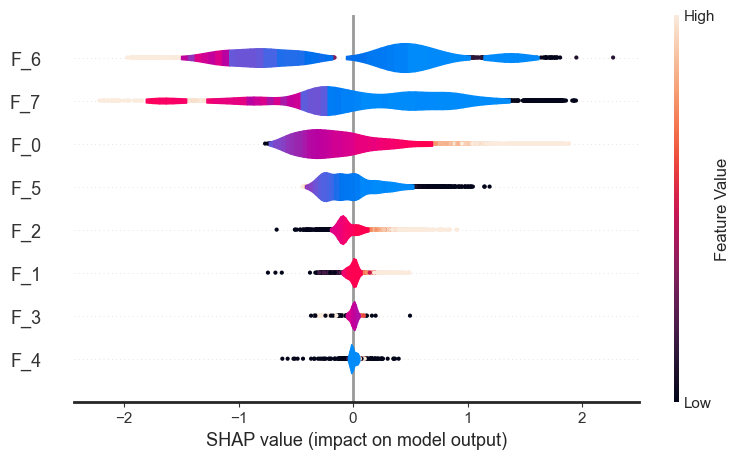

In [13]:
# shap summary plot (violin)
reg.plot_shap_summary(plot_type="violin")

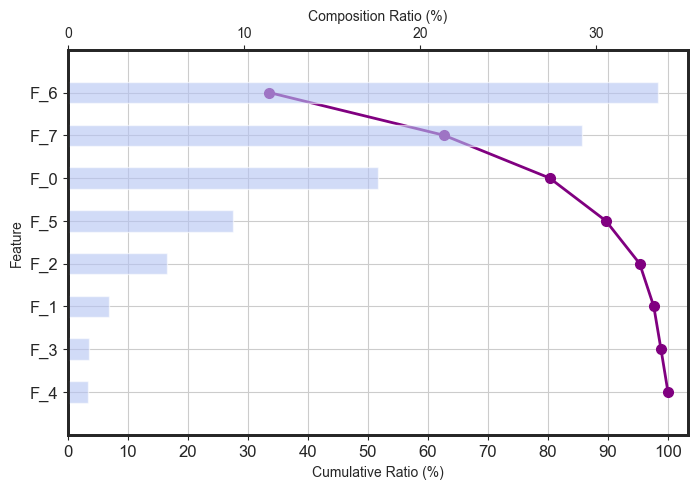

In [14]:
# plot shap waterfall plot
reg.plot_shap_waterfall()

In [15]:
# model's fitting params (or reg.params)
reg.get_params()

{'eval_metric': 'rmse',
 'tree_method': 'hist',
 'objective': 'reg:squarederror',
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 1,
 'gamma': 0.0,
 'reg_alpha': 0.0,
 'reg_lambda': 1.0,
 'subsample': 0.9,
 'max_delta_step': 1,
 'verbosity': 0,
 'nthread': 4}

In [16]:
reg.model_

## You can use the `RegressionMetrics` class to evaluate your model

In [17]:
from slickml.metrics import RegressionMetrics

metrics = RegressionMetrics(y_test, y_pred)

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.812000,0.812000,0.338000,0.247000,0.023000,0.191000,0.868000,0.294000,1.060000


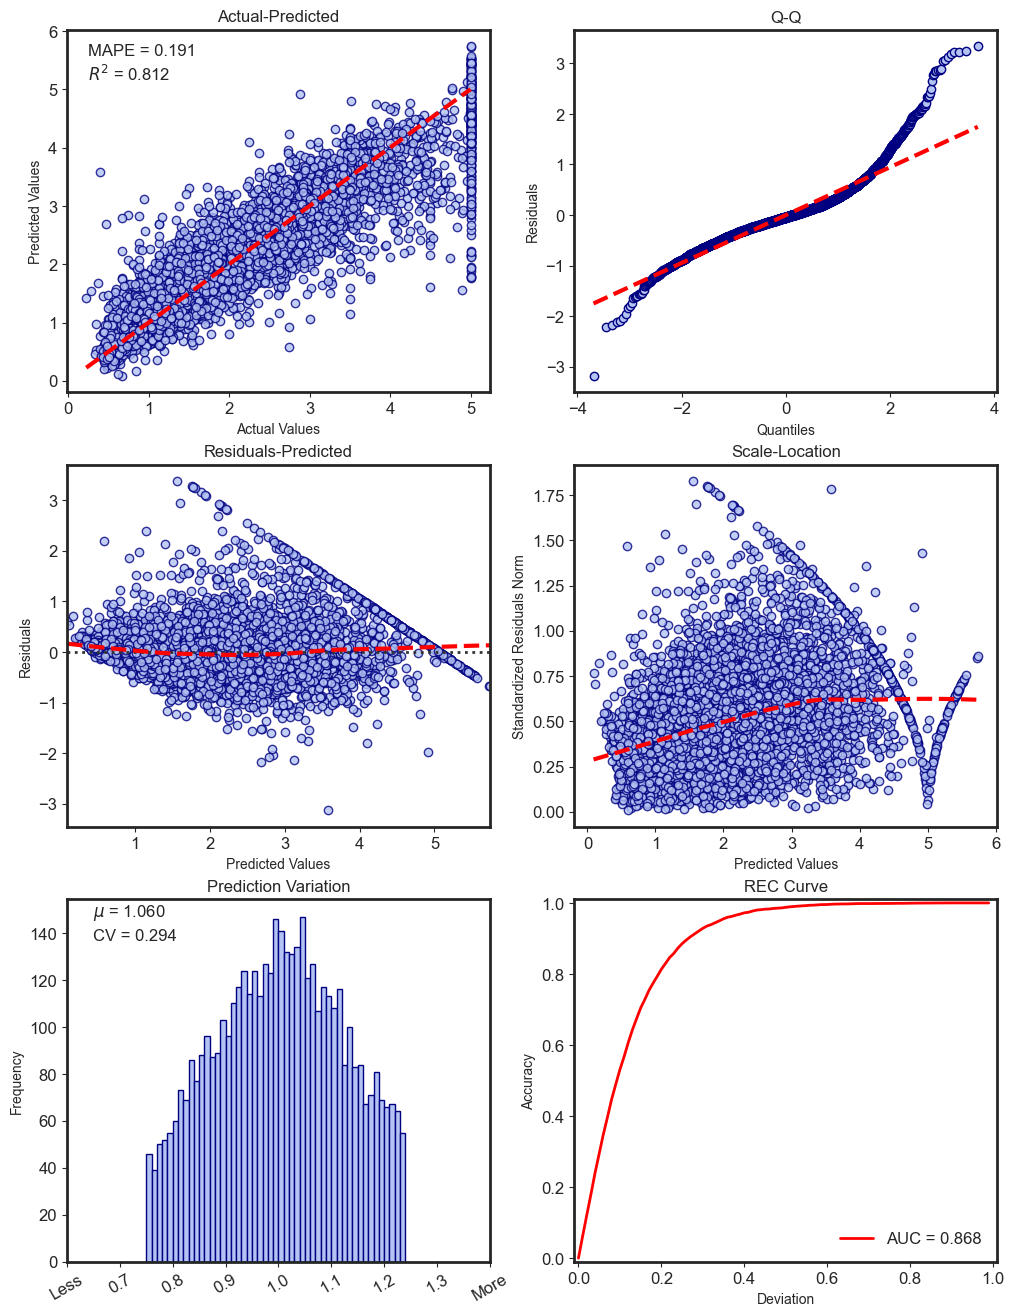

In [18]:
metrics.plot()

### Feel free to add your favorite `Example` via a `pull-request`.
### More details can be found in our [Contributing Document](https://github.com/slickml/slick-ml/blob/master/CONTRIBUTING.md).